In [23]:
#%%
import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t
import os
import h5py
from matplotlib import pyplot as plt
import matplotlib as mpl
import time
import csv
import pandas as pd

 
tic = time.perf_counter()
plt.close("all")

In [24]:
section_height = 0.0667
section_width = 0.365
section_length_1 = 2.68
section_length_2 = 2.66

# Use LaTeX font rendering (Computer Modern Roman)
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']
 
# Generelt større og mer lesbar tekst
mpl.rcParams.update({
    'font.size': 14,              # Generell tekststørrelse
    'axes.labelsize': 14,         # Aksetitler
    'axes.titlesize': 16,         # Plot-titler
    'legend.fontsize': 12,        # Tekst i legend
    'xtick.labelsize': 12,        # X-tick labels
    'ytick.labelsize': 12         # Y-tick labels
})

In [25]:
#2D
test_name = "2D"
section_name_US = "MDS_2D_Harmonic"
section_name_DS = "MUS_2D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)


['HAR_INT_MDS_GAP_213D_03_01_01_000', 'HAR_INT_MDS_GAP_213D_03_01_01_001', 'HAR_INT_MDS_GAP_213D_03_01_01_002', 'HAR_INT_MDS_GAP_213D_03_01_02_000', 'HAR_INT_MDS_GAP_213D_03_01_02_001', 'HAR_INT_MDS_GAP_213D_03_01_02_003', 'HAR_INT_MDS_GAP_213D_03_01_03_000', 'HAR_INT_MDS_GAP_213D_03_01_03_001', 'HAR_INT_MDS_GAP_213D_03_01_03_002', 'HAR_INT_MDS_GAP_213D_03_01_04_000', 'HAR_INT_MDS_GAP_213D_03_01_04_001', 'HAR_INT_MDS_GAP_213D_03_01_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_01_01_000', 'HAR_INT_MUS_GAP_213D_03_01_01_001', 'HAR_INT_MUS_GAP_213D_03_01_01_004', 'HAR_INT_MUS_GAP_213D_03_01_02_000', 'HAR_INT_MUS_GAP_213D_03_01_02_001', 'HAR_INT_MUS_GAP_213D_03_01_02_003', 'HAR_INT_MUS_GAP_213D_03_01_03_001', 'HAR_INT_MUS_GAP_213D_03_01_03_002', 'HAR_INT_MUS_GAP_213D_03_01_03_003', 'HAR_INT_MUS_GAP_213D_03_01_04_000', 'HAR_INT_MUS_GAP_213D_03_01_04_001', 'HAR_INT_MUS_GAP_21

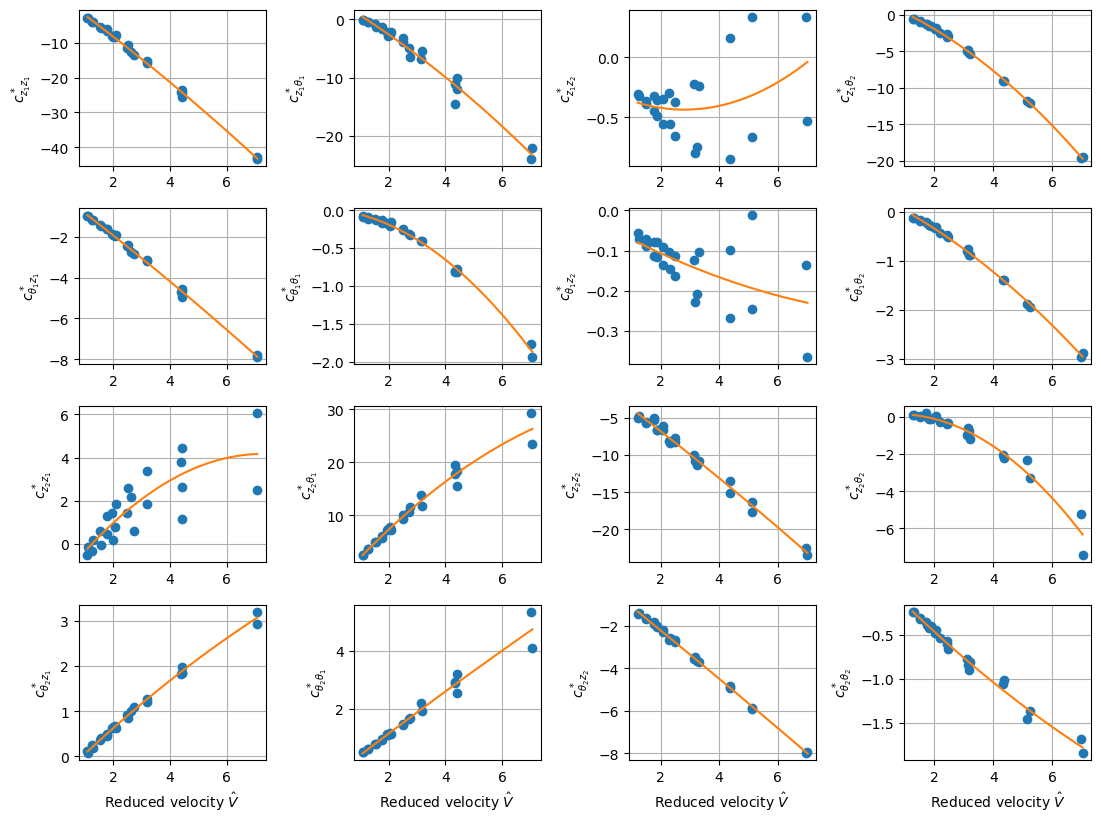

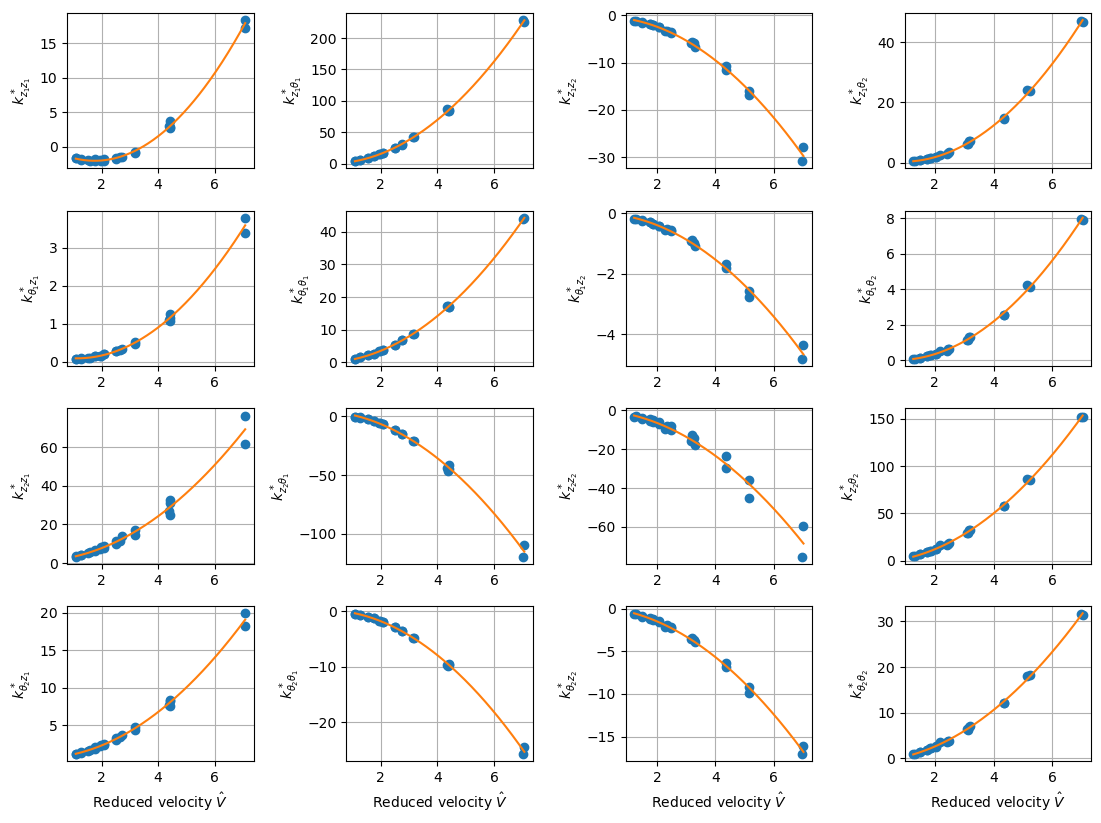

'\nexcel_path = ".\\Excel_AD\\"\nall_ads_gap2D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)\n'

In [26]:
poly = 2

ads_list = []
val_list = []
expf_list = []

fig_damping_2D, _ = plt.subplots(4,4)
fig_stiffness_2D, _ = plt.subplots(4,4)

all_ads_gap2D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap2D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap2D.append(ads_DS)

'''
all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_2D_damping.png')
fig_damping_2D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_2D_stiffness.png')
fig_stiffness_2D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, f'AD_2D_damping_poly{poly}.png')
fig_damping_2D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, f'AD_2D_stiffness_poly{poly}.png')
fig_stiffness_2D.savefig(stiffness_path, bbox_inches="tight")
plt.show()
'''

all_ads_gap2D.plot(fig_damping = fig_damping_2D, fig_stiffness=fig_stiffness_2D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
plt.show()

'''
excel_path = ".\\Excel_AD\\"
all_ads_gap2D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)
'''

In [27]:
#1D
test_name = "1D"
section_name_US = "MDS_1D_Harmonic"
section_name_DS = "MUS_1D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)


['HAR_INT_MDS_GAP_213D_03_02_01_001', 'HAR_INT_MDS_GAP_213D_03_02_01_002', 'HAR_INT_MDS_GAP_213D_03_02_02_000', 'HAR_INT_MDS_GAP_213D_03_02_02_001', 'HAR_INT_MDS_GAP_213D_03_02_03_000', 'HAR_INT_MDS_GAP_213D_03_02_03_001', 'HAR_INT_MDS_GAP_213D_03_02_04_000', 'HAR_INT_MDS_GAP_213D_03_02_04_001']
[array([0, 1], dtype=int64), array([2, 3], dtype=int64), array([4, 5], dtype=int64), array([6, 7], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_03_01_000', 'HAR_INT_MUS_GAP_213D_03_03_01_001', 'HAR_INT_MUS_GAP_213D_03_03_01_002', 'HAR_INT_MUS_GAP_213D_03_03_02_000', 'HAR_INT_MUS_GAP_213D_03_03_02_001', 'HAR_INT_MUS_GAP_213D_03_03_02_002', 'HAR_INT_MUS_GAP_213D_03_03_03_000', 'HAR_INT_MUS_GAP_213D_03_03_03_001', 'HAR_INT_MUS_GAP_213D_03_03_03_002', 'HAR_INT_MUS_GAP_213D_03_03_04_000', 'HAR_INT_MUS_GAP_213D_03_03_04_001', 'HAR_INT_MUS_GAP_213D_03_03_04_002']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]


In [28]:
ads_list = []
val_list = []
expf_list = []

'''
fig_damping_1D, _ = plt.subplots(4,4)
fig_stiffness_1D, _ = plt.subplots(4,4)
'''

all_ads_gap1D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap1D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap1D.append(ads_DS)


'''
all_ads_gap1D.plot(fig_damping = fig_damping_1D, fig_stiffness=fig_stiffness_1D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_1D_damping.png')
fig_damping_1D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_1D_stiffness.png')
fig_stiffness_1D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

all_ads_gap1D.plot(fig_damping = fig_damping_1D, fig_stiffness=fig_stiffness_1D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, f'AD_1D_damping_poly{poly}.png')
fig_damping_1D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, f'AD_1D_stiffness_poly{poly}.png')
fig_stiffness_1D.savefig(stiffness_path, bbox_inches="tight")
plt.show()'''

'''
excel_path = ".\\Excel_AD\\"
all_ads_gap1D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)
'''

'\nexcel_path = ".\\Excel_AD\\"\nall_ads_gap1D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)\n'

In [29]:
#3D
test_name = "3D"
section_name_US = "MDS_3D_Harmonic"
section_name_DS = "MUS_3D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_213D_03_03_01_000', 'HAR_INT_MDS_GAP_213D_03_03_01_001', 'HAR_INT_MDS_GAP_213D_03_03_01_002', 'HAR_INT_MDS_GAP_213D_03_03_02_000', 'HAR_INT_MDS_GAP_213D_03_03_02_001', 'HAR_INT_MDS_GAP_213D_03_03_02_002', 'HAR_INT_MDS_GAP_213D_03_03_03_000', 'HAR_INT_MDS_GAP_213D_03_03_03_001', 'HAR_INT_MDS_GAP_213D_03_03_03_002', 'HAR_INT_MDS_GAP_213D_03_03_04_001', 'HAR_INT_MDS_GAP_213D_03_03_04_002', 'HAR_INT_MDS_GAP_213D_03_03_04_003', 'HAR_INT_MDS_GAP_213D_03_03_04_004']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11, 12], dtype=int64)]
['HAR_INT_MUS_GAP_213D_03_02_01_000', 'HAR_INT_MUS_GAP_213D_03_02_01_001', 'HAR_INT_MUS_GAP_213D_03_02_01_002', 'HAR_INT_MUS_GAP_213D_03_02_02_000', 'HAR_INT_MUS_GAP_213D_03_02_02_001', 'HAR_INT_MUS_GAP_213D_03_02_02_003', 'HAR_INT_MUS_GAP_213D_03_02_03_000', 'HAR_INT_MUS_GAP_213D_03_02_03_001', 'HAR_INT_MUS_GAP_213D_03_02_03_002', 'HAR_INT_MUS_GAP_213D_03_02_04_000', 'HAR_INT_MUS_GA

In [30]:
ads_list = []
val_list = []
expf_list = []

'''
fig_damping_3D, _ = plt.subplots(4,4)
fig_stiffness_3D, _ = plt.subplots(4,4)
'''

all_ads_gap3D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap3D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap3D.append(ads_DS)

'''
all_ads_gap3D.plot(fig_damping = fig_damping_3D, fig_stiffness=fig_stiffness_3D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_3D_damping.png')
fig_damping_3D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_3D_stiffness.png')
fig_stiffness_3D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

all_ads_gap3D.plot(fig_damping = fig_damping_3D, fig_stiffness=fig_stiffness_3D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, f'AD_3D_damping_poly{poly}.png')
fig_damping_3D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, f'AD_3D_stiffness_poly{poly}.png')
fig_stiffness_3D.savefig(stiffness_path, bbox_inches="tight")
plt.show()'''

'''
excel_path = ".\\Excel_AD\\"
all_ads_gap3D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)
'''

'\nexcel_path = ".\\Excel_AD\\"\nall_ads_gap3D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)\n'

In [31]:
#4D
test_name = "4D"
section_name_US = "MDS_4D_Harmonic"
section_name_DS = "MUS_4D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_45D_03_01_01_003', 'HAR_INT_MDS_GAP_45D_03_01_01_004', 'HAR_INT_MDS_GAP_45D_03_01_01_006', 'HAR_INT_MDS_GAP_45D_03_01_02_002', 'HAR_INT_MDS_GAP_45D_03_01_02_003', 'HAR_INT_MDS_GAP_45D_03_01_02_004', 'HAR_INT_MDS_GAP_45D_03_01_03_002', 'HAR_INT_MDS_GAP_45D_03_01_03_003', 'HAR_INT_MDS_GAP_45D_03_01_03_004', 'HAR_INT_MDS_GAP_45D_03_01_04_001', 'HAR_INT_MDS_GAP_45D_03_01_04_002', 'HAR_INT_MDS_GAP_45D_03_01_04_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 10, 11], dtype=int64)]
['HAR_INT_MUS_GAP_45D_03_01_01_000', 'HAR_INT_MUS_GAP_45D_03_01_01_001', 'HAR_INT_MUS_GAP_45D_03_01_01_002', 'HAR_INT_MUS_GAP_45D_03_01_02_000', 'HAR_INT_MUS_GAP_45D_03_01_02_001', 'HAR_INT_MUS_GAP_45D_03_01_02_002', 'HAR_INT_MUS_GAP_45D_03_01_03_000', 'HAR_INT_MUS_GAP_45D_03_01_03_001', 'HAR_INT_MUS_GAP_45D_03_01_03_002', 'HAR_INT_MUS_GAP_45D_03_01_04_000', 'HAR_INT_MUS_GAP_45D_03_01_04_001', 'HAR_INT_MUS_GAP_45D_03_01_04_002']
[array

In [32]:
ads_list = []
val_list = []
expf_list = []

'''
fig_damping_4D, _ = plt.subplots(4,4)
fig_stiffness_4D, _ = plt.subplots(4,4)
'''

all_ads_gap4D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap4D.append(ads_US)

        
    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap4D.append(ads_DS)

'''
all_ads_gap4D.plot(fig_damping = fig_damping_4D, fig_stiffness=fig_stiffness_4D)

file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_4D_damping.png')
fig_damping_4D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_4D_stiffness.png')
fig_stiffness_4D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

all_ads_gap4D.plot(fig_damping = fig_damping_4D, fig_stiffness=fig_stiffness_4D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, f'AD_4D_damping_poly{poly}.png')
fig_damping_4D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, f'AD_4D_stiffness_poly{poly}.png')
fig_stiffness_4D.savefig(stiffness_path, bbox_inches="tight")
plt.show()
'''

'''
excel_path = ".\\Excel_AD\\"
all_ads_gap4D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)
'''


'\nexcel_path = ".\\Excel_AD\\"\nall_ads_gap4D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)\n'

In [33]:
#5D
test_name = "5D"
section_name_US = "MDS_5D_Harmonic"
section_name_DS = "MUS_5D_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments for US
h5_file_US = os.path.join(h5_input_path, section_name_US)
f_US = h5py.File((h5_file_US + ".hdf5"), "r")

data_set_groups_US = list(f_US)
print(data_set_groups_US)

exps_US = np.array([])

for data_set_group in data_set_groups_US:
    exps_US = np.append(exps_US,w3t.Experiment.fromWTT(f_US[data_set_group]))

tests_with_equal_motion_US = w3t.group_motions(exps_US)
print(tests_with_equal_motion_US)


#Load all experiments for DS
h5_file_DS = os.path.join(h5_input_path, section_name_DS)
f_DS = h5py.File((h5_file_DS + ".hdf5"), "r")

data_set_groups_DS = list(f_DS)
print(data_set_groups_DS)

exps_DS = np.array([])

for data_set_group in data_set_groups_DS:
    exps_DS = np.append(exps_DS,w3t.Experiment.fromWTT(f_DS[data_set_group]))

tests_with_equal_motion_DS = w3t.group_motions(exps_DS)
print(tests_with_equal_motion_DS)

['HAR_INT_MDS_GAP_45D_03_02_01_001', 'HAR_INT_MDS_GAP_45D_03_02_01_002', 'HAR_INT_MDS_GAP_45D_03_02_01_003', 'HAR_INT_MDS_GAP_45D_03_02_02_001', 'HAR_INT_MDS_GAP_45D_03_02_02_002', 'HAR_INT_MDS_GAP_45D_03_02_02_003', 'HAR_INT_MDS_GAP_45D_03_02_03_001', 'HAR_INT_MDS_GAP_45D_03_02_03_002', 'HAR_INT_MDS_GAP_45D_03_02_03_004', 'HAR_INT_MDS_GAP_45D_03_02_04_001', 'HAR_INT_MDS_GAP_45D_03_02_04_002', 'HAR_INT_MDS_GAP_45D_03_02_04_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8], dtype=int64), array([ 9, 11], dtype=int64)]
['HAR_INT_MUS_GAP_45D_03_02_01_000', 'HAR_INT_MUS_GAP_45D_03_02_01_001', 'HAR_INT_MUS_GAP_45D_03_02_01_002', 'HAR_INT_MUS_GAP_45D_03_02_02_000', 'HAR_INT_MUS_GAP_45D_03_02_02_001', 'HAR_INT_MUS_GAP_45D_03_02_02_002', 'HAR_INT_MUS_GAP_45D_03_02_03_000', 'HAR_INT_MUS_GAP_45D_03_02_03_001', 'HAR_INT_MUS_GAP_45D_03_02_03_002', 'HAR_INT_MUS_GAP_45D_03_02_04_000', 'HAR_INT_MUS_GAP_45D_03_02_04_001', 'HAR_INT_MUS_GAP_45D_03_02_04_002']
[array([0,

'\nexcel_path = ".\\Excel_AD\\"\nall_ads_gap5D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)\n'

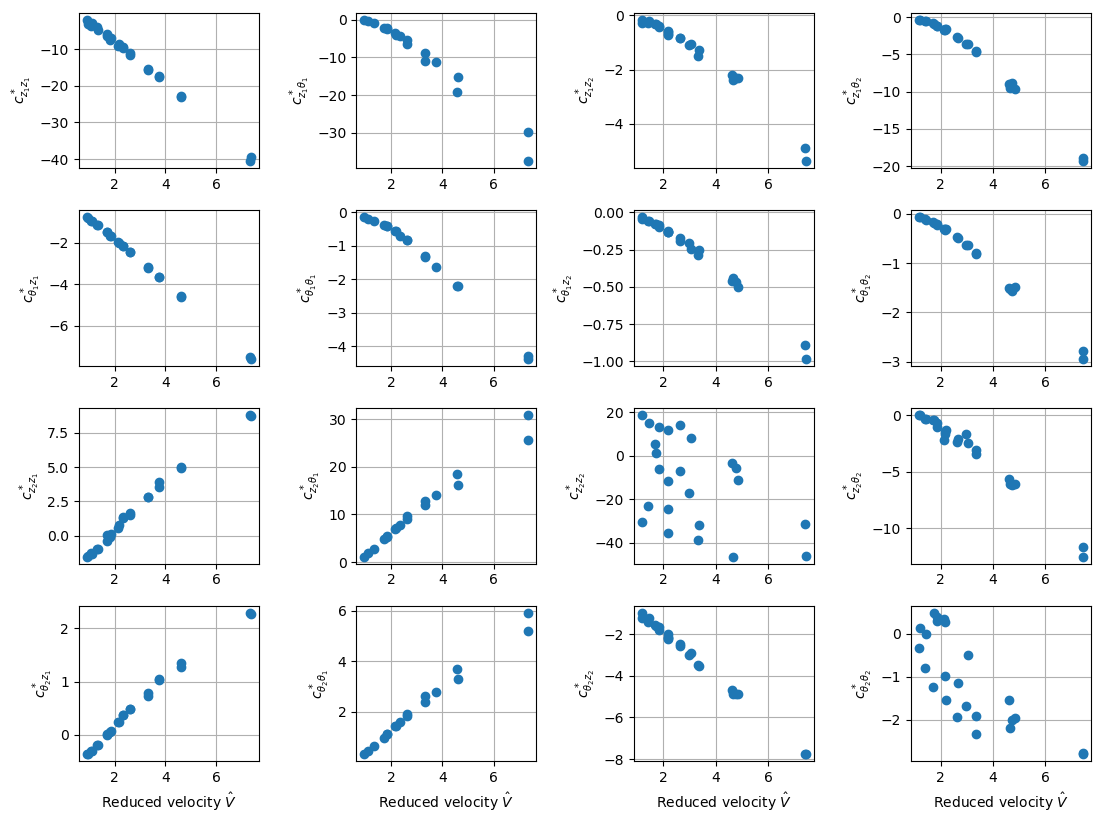

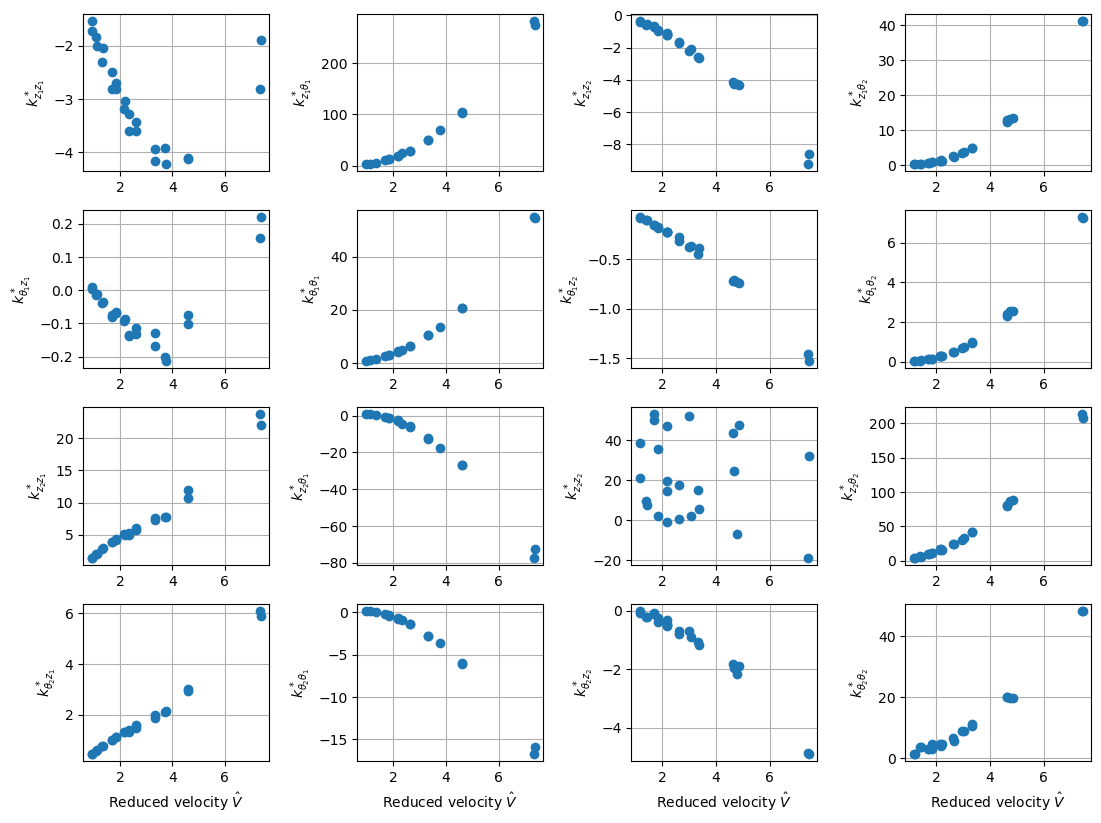

In [34]:
ads_list = []
val_list = []
expf_list = []


fig_damping_5D, _ = plt.subplots(4,4)
fig_stiffness_5D, _ = plt.subplots(4,4)


all_ads_gap5D = w3t.AerodynamicDerivatives4x4()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion_US[k1])-1):
        exp0 = exps_US[tests_with_equal_motion_US[k1][0]]
        exp1 = exps_US[tests_with_equal_motion_US[k1][k2+1]]
        #print(f"Processing US: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_US, val_US, expf_US = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=True)
        ads_list.append(ads_US)
        val_list.append(val_US)
        expf_list.append(expf_US)
        all_ads_gap5D.append(ads_US)

    for k2 in range(len(tests_with_equal_motion_DS[k1])-1):
        exp0 = exps_DS[tests_with_equal_motion_DS[k1][0]]
        exp1 = exps_DS[tests_with_equal_motion_DS[k1][k2+1]]
        #print(f"Processing DS: {exp1}")
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)
        ads_DS, val_DS, expf_DS = w3t.AerodynamicDerivatives4x4.fromWTT(exp0, exp1, section_width, section_length_1, section_length_2, upstream_in_rig=False)
        ads_list.append(ads_DS)
        val_list.append(val_DS)
        expf_list.append(expf_DS)
        all_ads_gap5D.append(ads_DS)

all_ads_gap5D.plot(fig_damping = fig_damping_5D, fig_stiffness=fig_stiffness_5D)

'''
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, 'AD_5D_damping.png')
fig_damping_5D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, 'AD_5D_stiffness.png')
fig_stiffness_5D.savefig(stiffness_path, bbox_inches="tight")
plt.show()

all_ads_gap5D.plot(fig_damping = fig_damping_5D, fig_stiffness=fig_stiffness_5D, mode='total+poly', orders=np.ones(32,dtype=int)*poly)
file_path = ".\\Plots_AD\\"
damping_path = os.path.join(file_path, f'AD_5D_damping_poly{poly}.png')
fig_damping_5D.savefig(damping_path, bbox_inches="tight")
stiffness_path = os.path.join(file_path, f'AD_5D_stiffness_poly{poly}.png')
fig_stiffness_5D.savefig(stiffness_path, bbox_inches="tight")
plt.show()'''

'''
excel_path = ".\\Excel_AD\\"
all_ads_gap5D.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(32,dtype=int)*poly)
'''

In [35]:
test_name = "Single"
section_name = "Single_Harmonic"
h5_input_path = ".\\\H5F\\Single Harmonic\\"

#Load all experiments
h5_file = os.path.join(h5_input_path, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

data_set_groups = list(f)
print(data_set_groups)

exps = np.array([])

for data_set_group in data_set_groups:
    exps = np.append(exps,w3t.Experiment.fromWTT(f[data_set_group]))

tests_with_equal_motion = w3t.group_motions(exps)
print(tests_with_equal_motion)

ads_list = []
val_list = []
expf_list = []

'''
fig_damping, _ = plt.subplots(2,2)
fig_stiffness, _ = plt.subplots(2,2)
'''

all_ads = w3t.AerodynamicDerivatives2x2()

for k1 in [0,1,2,3]:
    for k2 in range(len(tests_with_equal_motion[k1])-1):
        exp0 = exps[tests_with_equal_motion[k1][0]]
        exp1 = exps[tests_with_equal_motion[k1][k2+1]]
        exp0.filt_forces(6,5)
        exp1.filt_forces(6,5)

        #print("Experiment " + str(tests_with_equal_motion[k1][0]))
        #print(exp0.motion_type())
        
        ads, val, expf = w3t.AerodynamicDerivatives2x2.fromWTT(exp0,exp1,section_width,section_length_1)
        ads_list.append(ads)
        val_list.append(val)
        expf_list.append(expf)
        all_ads.append(ads)   

'''
excel_path = ".\\Excel_AD\\"
all_ads.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(8,dtype=int)*poly)
'''

['HAR_INT_SINGLE_03_01_000', 'HAR_INT_SINGLE_03_01_001', 'HAR_INT_SINGLE_03_01_002', 'HAR_INT_SINGLE_03_02_000', 'HAR_INT_SINGLE_03_02_001', 'HAR_INT_SINGLE_03_02_002', 'HAR_INT_SINGLE_04_01_002', 'HAR_INT_SINGLE_04_01_003', 'HAR_INT_SINGLE_04_01_004', 'HAR_INT_SINGLE_04_01_005', 'HAR_INT_SINGLE_04_02_000', 'HAR_INT_SINGLE_04_02_001', 'HAR_INT_SINGLE_04_02_002', 'HAR_INT_SINGLE_04_02_003']
[array([0, 1, 2], dtype=int64), array([3, 4, 5], dtype=int64), array([6, 7, 8, 9], dtype=int64), array([10, 11, 12, 13], dtype=int64)]


'\nexcel_path = ".\\Excel_AD\\"\nall_ads.polyfit_to_excel(test_name=test_name, save_path=excel_path, orders=np.ones(8,dtype=int)*poly)\n'

In [36]:
all_ads.get_points()

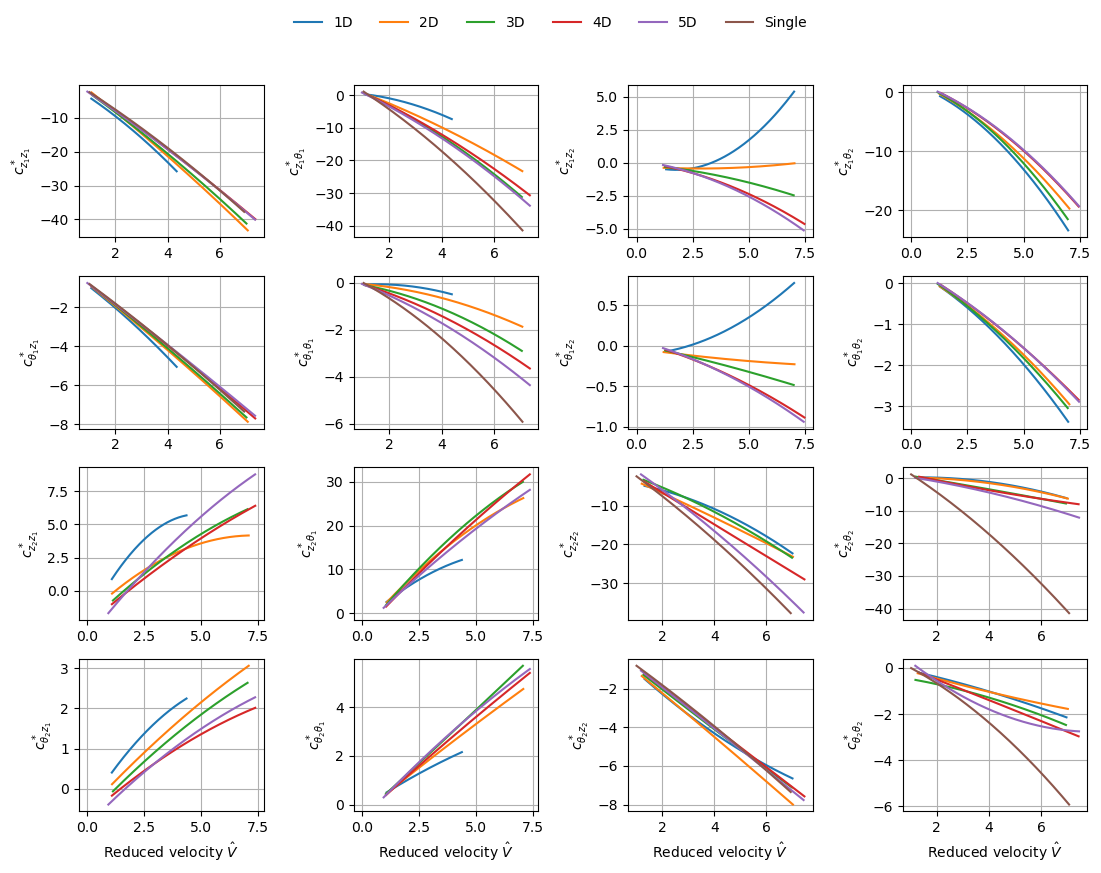

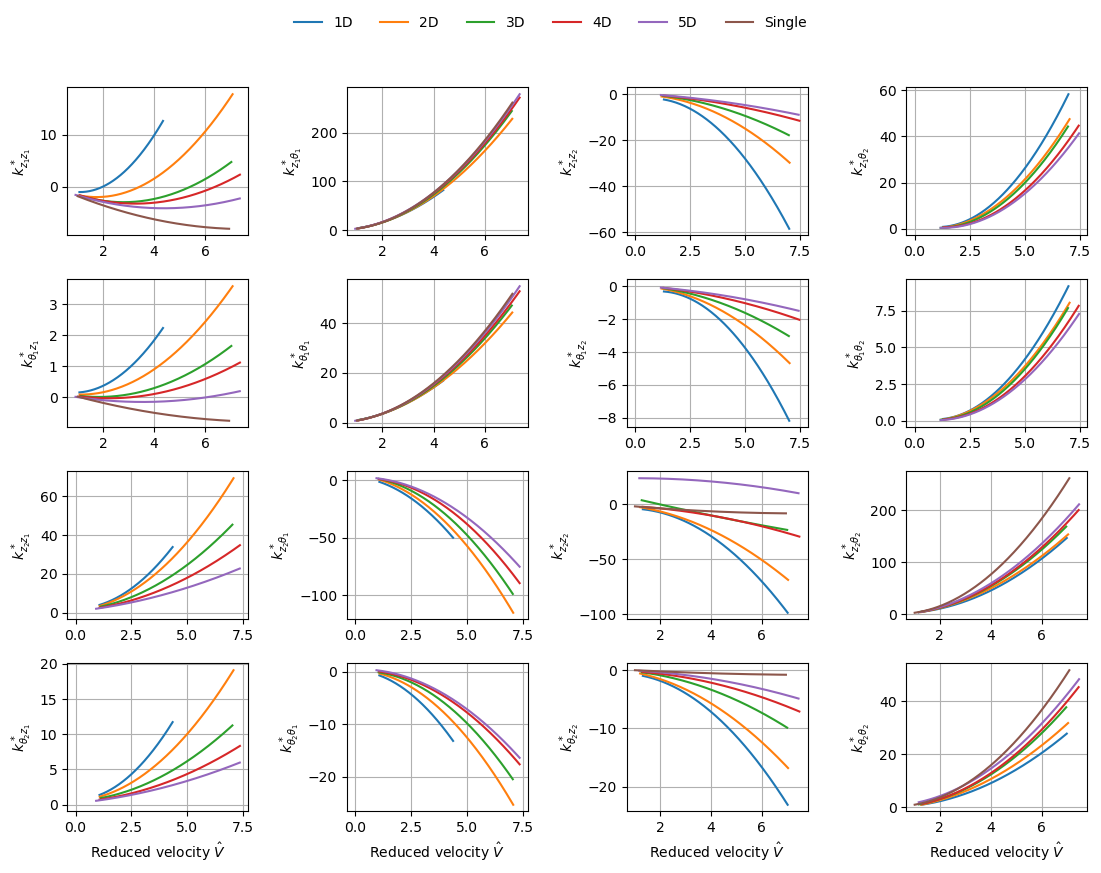

In [37]:
fig_d, fig_s = w3t._ads4x4.plot_compare(all_ads, all_ads_gap1D, all_ads_gap2D, all_ads_gap3D, all_ads_gap4D, all_ads_gap5D)

#fig_d.savefig("damping_comparison.png", dpi=300, bbox_inches='tight')
#fig_s.savefig("stiffness_comparison.png", dpi=300, bbox_inches='tight')



In [38]:
poly_coeff_single, v_range_single = all_ads.fit_poly()
poly_coeff_1D, v_range_1D = all_ads_gap1D.fit_poly()
poly_coeff_2D, v_range_2D = all_ads_gap2D.fit_poly()
poly_coeff_3D, v_range_3D = all_ads_gap3D.fit_poly()
poly_coeff_4D, v_range_4D = all_ads_gap4D.fit_poly()
poly_coeff_5D, v_range_5D = all_ads_gap5D.fit_poly()

In [39]:
file_path = ".\\Arrays_AD_ny\\"

# Dictionary of arrays to save
arrays_to_save = {
    "poly_coeff_single": poly_coeff_single[:, ::-1],
    "v_range_single": v_range_single,
    "poly_coeff_1D": poly_coeff_1D[:, ::-1],
    "v_range_1D": v_range_1D,
    "poly_coeff_2D": poly_coeff_2D[:, ::-1],
    "v_range_2D": v_range_2D,
    "poly_coeff_3D": poly_coeff_3D[:, ::-1],
    "v_range_3D": v_range_3D,
    "poly_coeff_4D": poly_coeff_4D[:, ::-1],
    "v_range_4D": v_range_4D,
    "poly_coeff_5D": poly_coeff_5D[:, ::-1],
    "v_range_5D": v_range_5D,
}

# Save each array as a separate .npy file
#for name, array in arrays_to_save.items():
#    np.save(os.path.join(file_path, f"{name}.npy"), array)

In [40]:
poly_coeff_k_single, k_range_single = all_ads.fit_poly_k()
poly_coeff_k_1D, k_range_1D = all_ads_gap1D.fit_poly_k()
poly_coeff_k_2D, k_range_2D = all_ads_gap2D.fit_poly_k()
poly_coeff_k_3D, k_range_3D = all_ads_gap3D.fit_poly_k()
poly_coeff_k_4D, k_range_4D = all_ads_gap4D.fit_poly_k()
poly_coeff_k_5D, k_range_5D = all_ads_gap5D.fit_poly_k()

In [41]:
print(poly_coeff_k_single, k_range_single)
print(poly_coeff_k_1D, k_range_1D)
print(poly_coeff_k_2D, k_range_2D)
print(poly_coeff_k_3D, k_range_3D)
print(poly_coeff_k_4D, k_range_4D)
print(poly_coeff_k_5D, k_range_5D)

[[-4.25289454e+00  7.61144608e+00 -6.41816460e+00]
 [-8.71482562e+00  1.62574127e+01 -7.90204535e+00]
 [ 2.26102519e+00 -4.97230003e+00  5.87246283e+00]
 [ 2.94766072e-01 -2.30264476e+00  1.61190998e-01]
 [-4.00871468e-01  6.80999183e-01 -1.13681183e+00]
 [-1.40221102e+00  2.28523862e+00 -1.09679122e+00]
 [ 2.67587897e-01 -5.04915321e-01  1.09404540e+00]
 [ 2.04654276e-01 -2.05403632e-01  7.31747549e-03]] [[0.14401995 0.99391341]
 [0.14136709 0.98519282]
 [0.14136709 0.98519282]
 [0.14401995 0.99391341]
 [0.14401995 0.99391341]
 [0.14136709 0.98519282]
 [0.14136709 0.98519282]
 [0.14401995 0.99391341]]
[[-3.5506984   6.63646765 -7.22155476]
 [-4.04036241  7.19669766 -3.0650839 ]
 [ 2.81438591 -4.27666829  1.14592821]
 [-6.84859737 10.19976956 -4.4774308 ]
 [-0.45987191  0.82087433 -1.31877436]
 [-0.39065462  0.49002729 -0.19301977]
 [ 0.35168015 -0.56042445  0.17293432]
 [-0.94807842  1.44655076 -0.65884007]
 [-3.34367153  2.99465996  0.82855908]
 [-2.51921427  2.23740651  2.47506048]


In [42]:
file_path = ".\\Arrays_AD_k\\"

# Dictionary of arrays to save
arrays_to_save = {
    "poly_coeff_single": poly_coeff_k_single,
    "k_range_single": k_range_single,
    "poly_coeff_1D": poly_coeff_k_1D,
    "k_range_1D": k_range_1D,
    "poly_coeff_2D": poly_coeff_k_2D,
    "k_range_2D": k_range_2D,
    "poly_coeff_3D": poly_coeff_k_3D,
    "k_range_3D": k_range_3D,
    "poly_coeff_4D": poly_coeff_k_4D,
    "k_range_4D": k_range_4D,
    "poly_coeff_5D": poly_coeff_k_5D,
    "k_range_5D": k_range_5D,
}

# Save each array as a separate .npy file
for name, array in arrays_to_save.items():
    np.save(os.path.join(file_path, f"{name}.npy"), array)

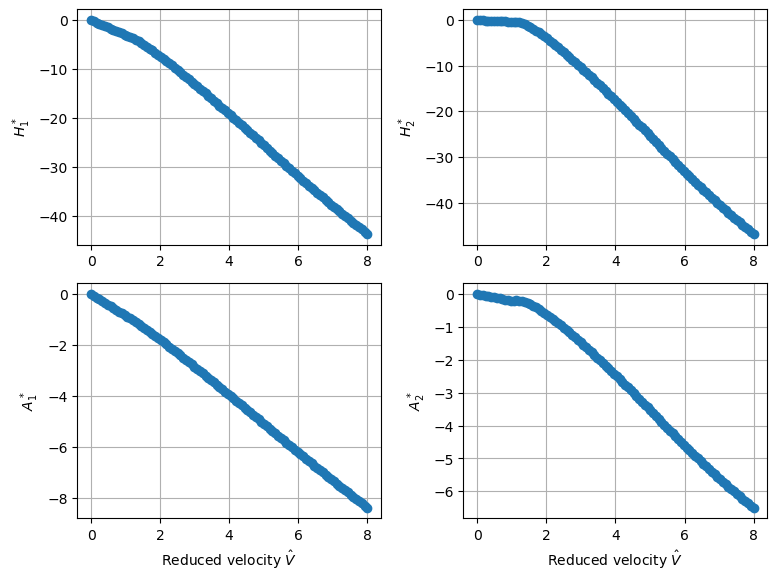

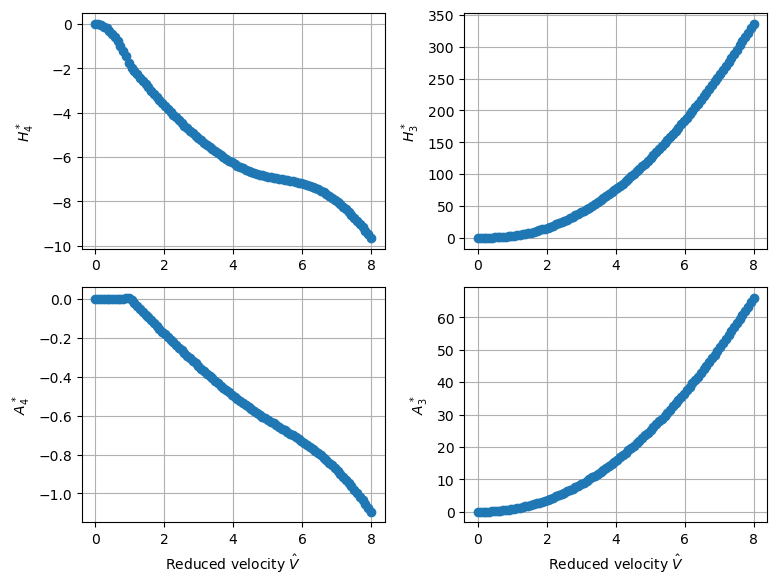

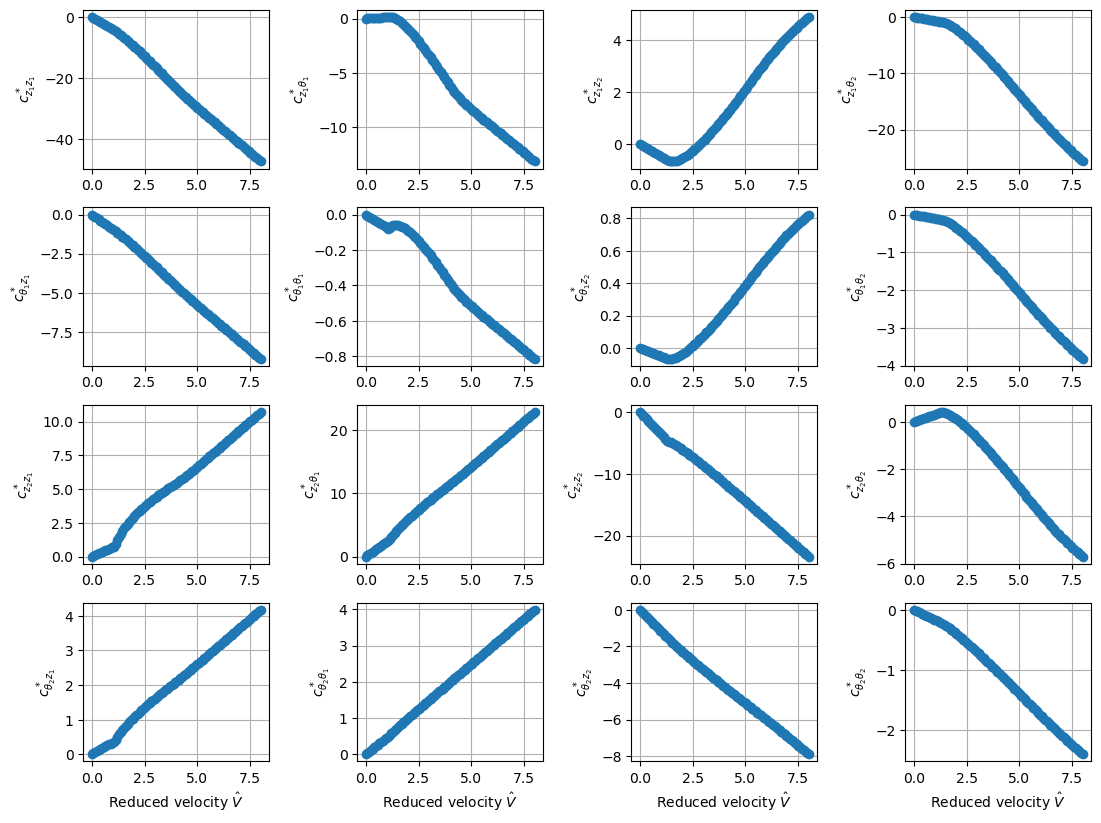

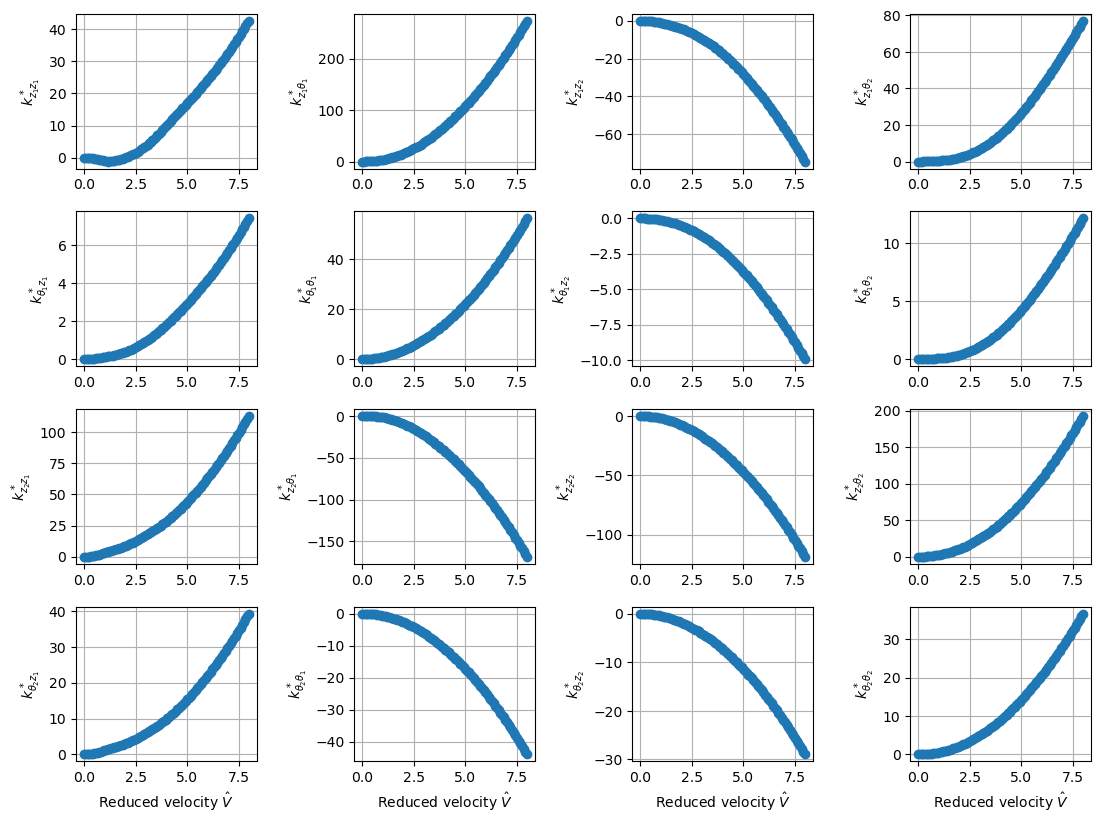

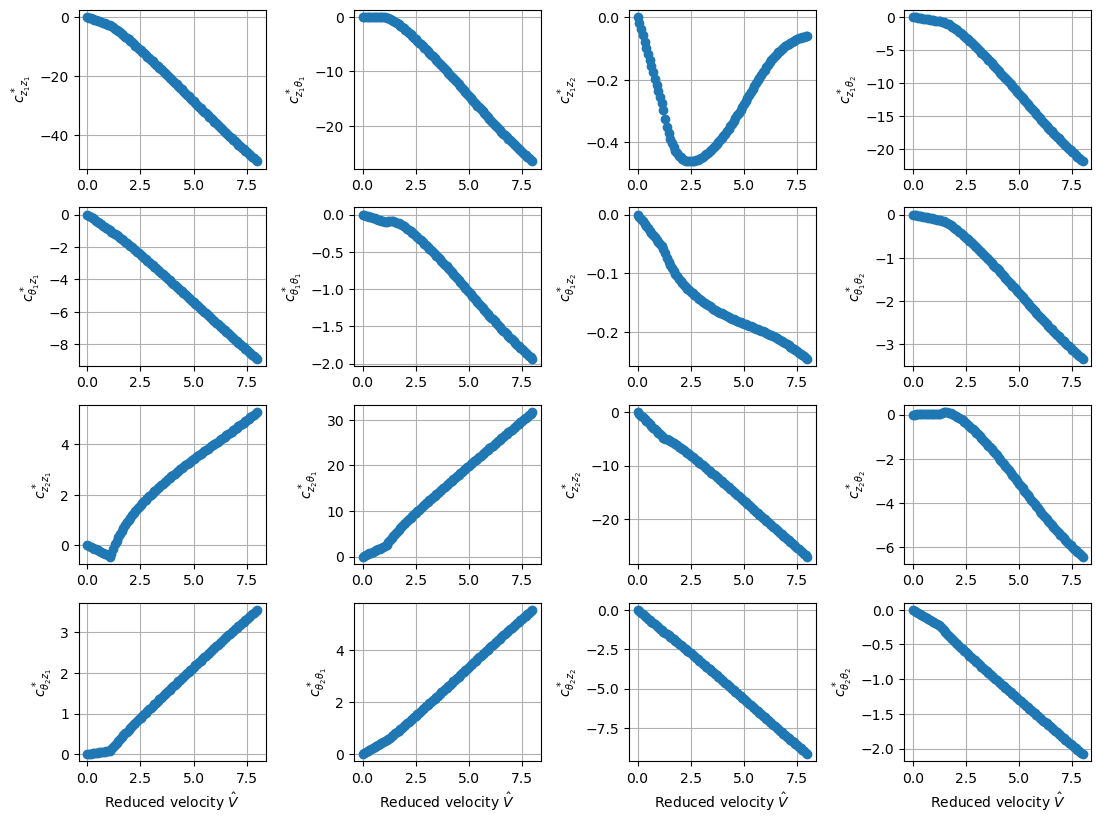

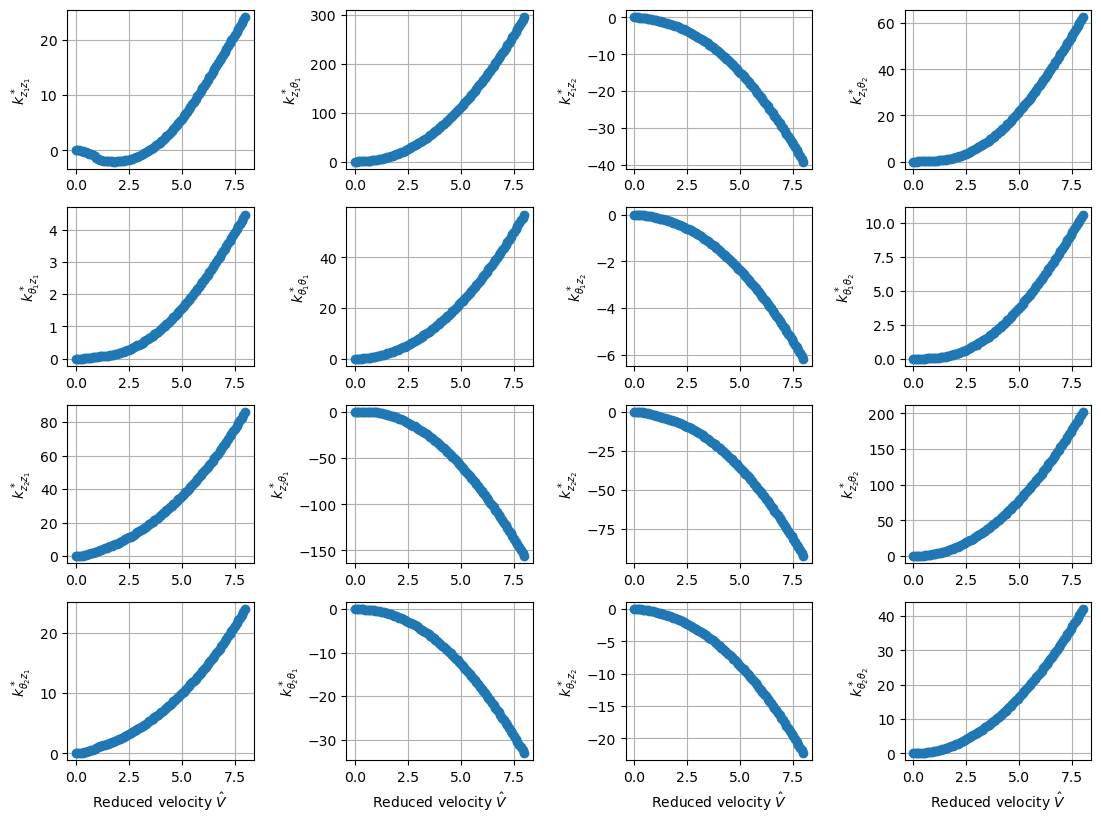

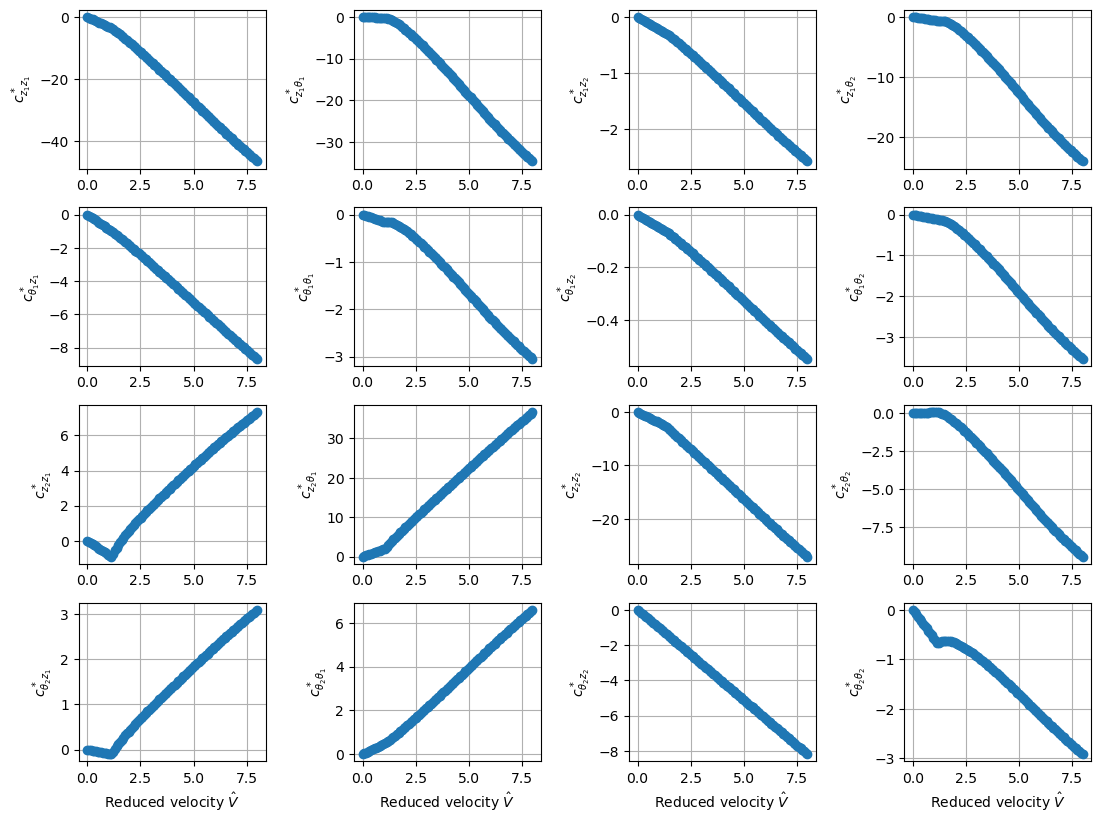

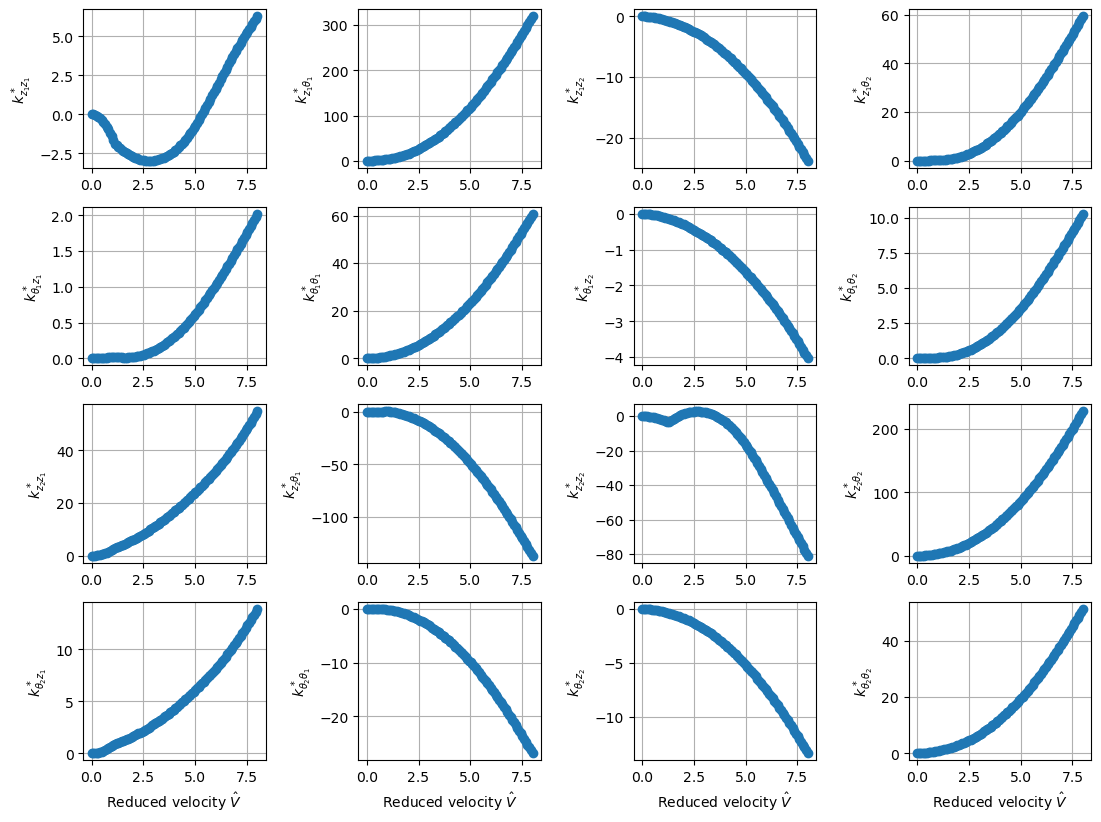

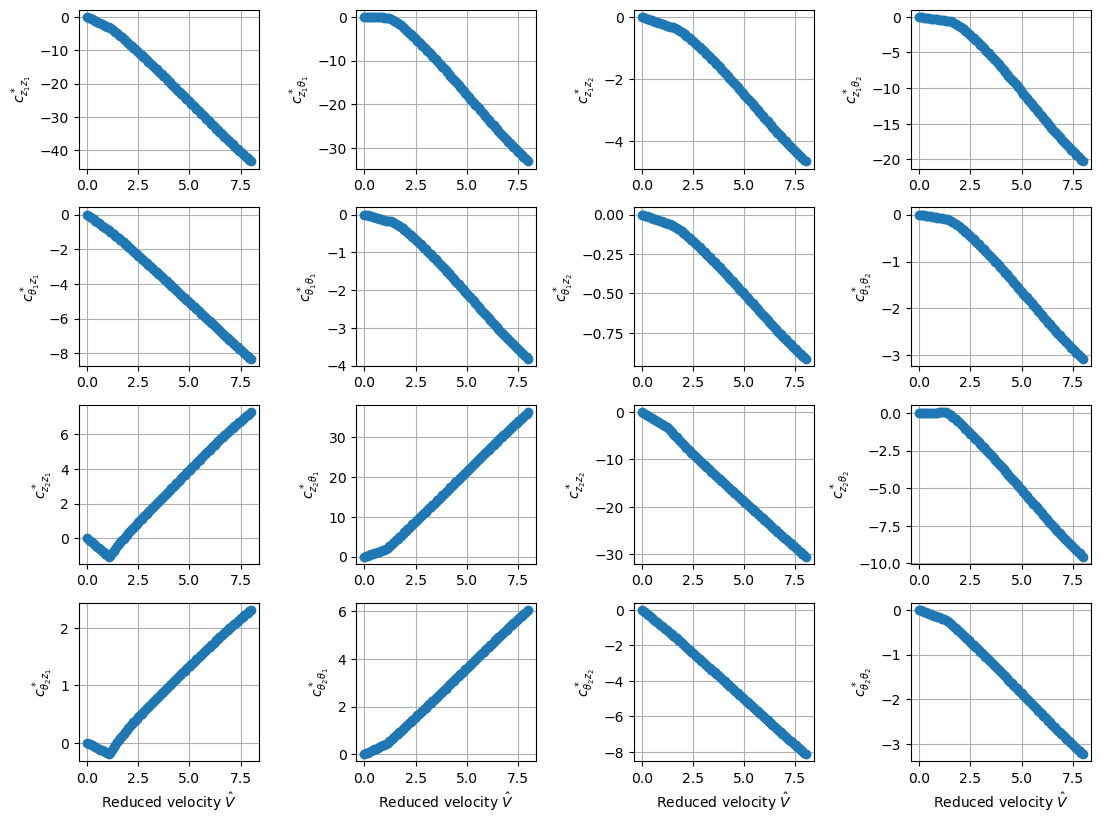

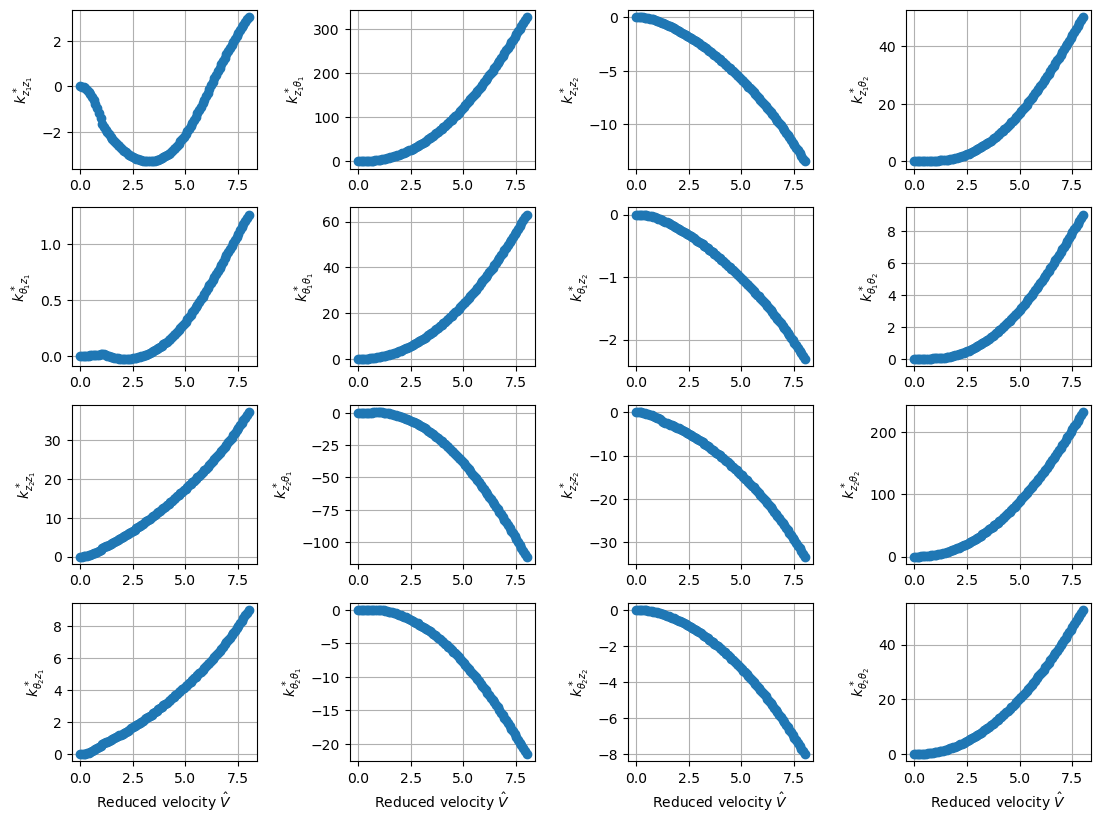

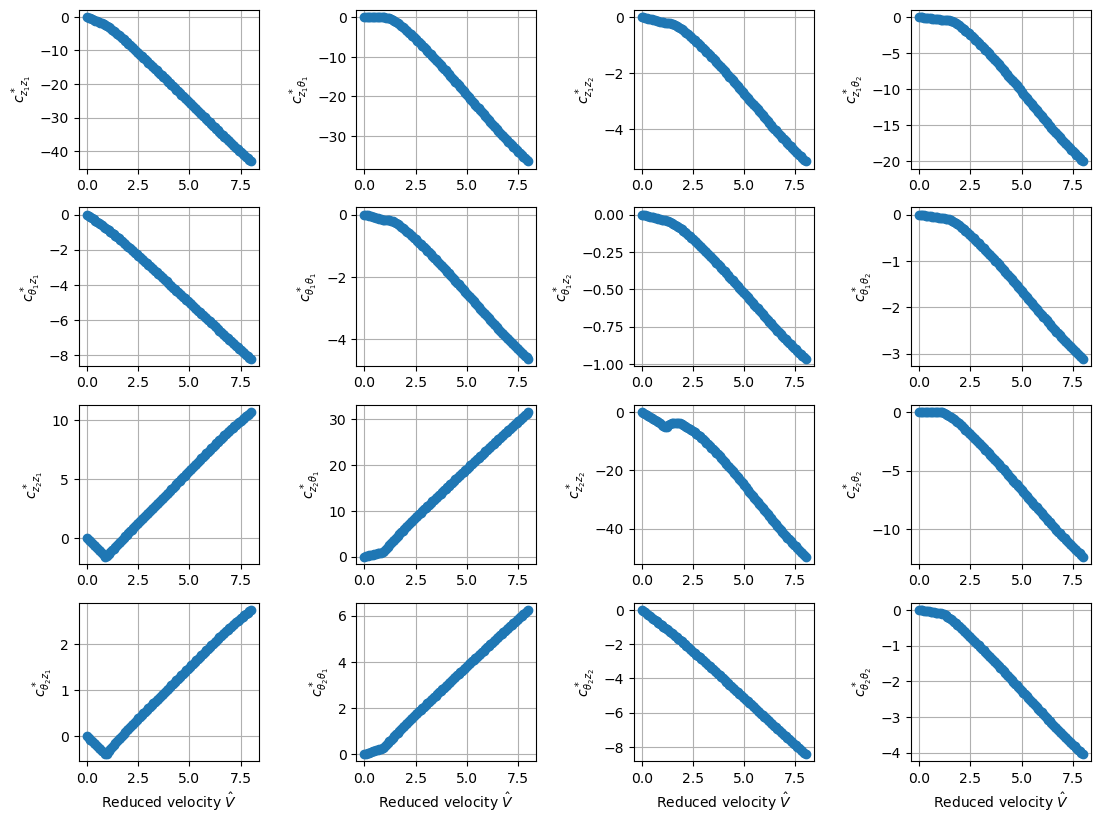

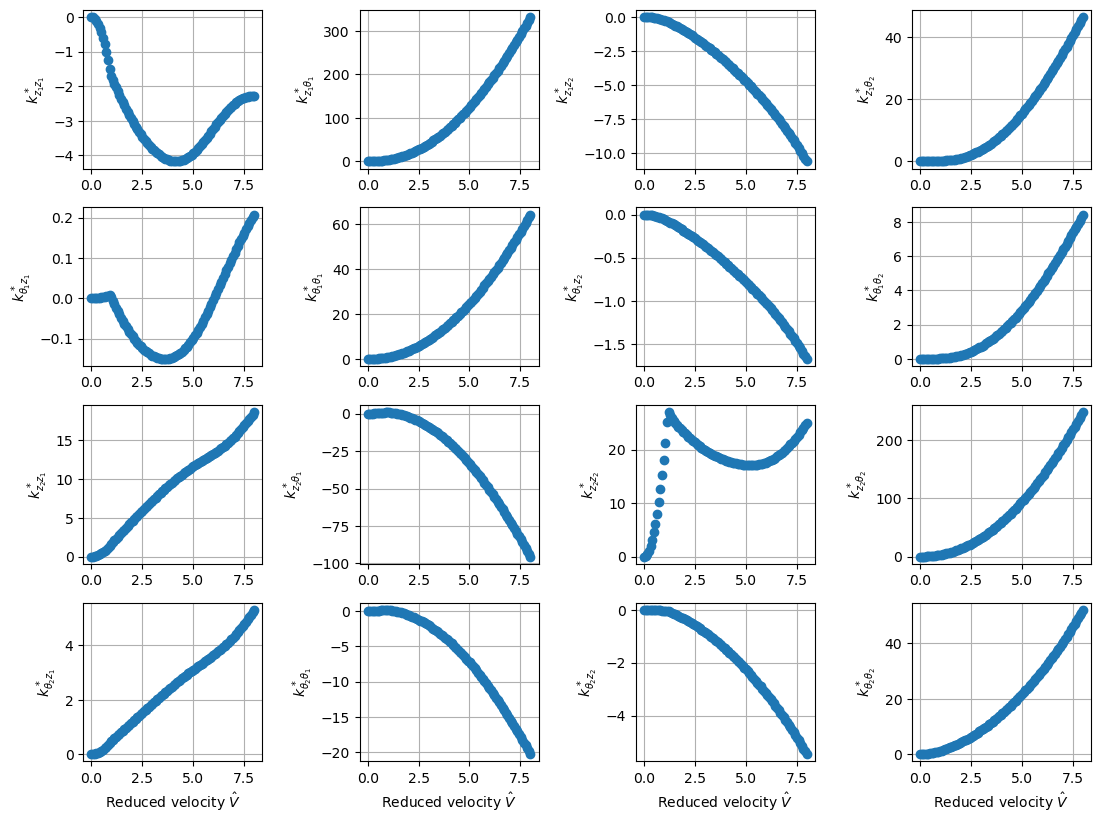

In [43]:
vred_new = np.linspace(0, 8, 100)

fig_damping, _ = plt.subplots(2,2)
fig_stiffness, _ = plt.subplots(2,2)
all_ads_new = all_ads.from_poly_k(poly_coeff_k_single, k_range_single, vred_new)
all_ads_new.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

fig_damping, _ = plt.subplots(4,4)
fig_stiffness, _ = plt.subplots(4,4)
all_ads_new_1D = all_ads_gap1D.from_poly_k(poly_coeff_k_1D, k_range_1D, vred_new)
all_ads_new_1D.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

fig_damping, _ = plt.subplots(4,4)
fig_stiffness, _ = plt.subplots(4,4)
all_ads_new_2D = all_ads_gap2D.from_poly_k(poly_coeff_k_2D, k_range_2D, vred_new)
all_ads_new_2D.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

fig_damping, _ = plt.subplots(4,4)
fig_stiffness, _ = plt.subplots(4,4)
all_ads_new_3D = all_ads_gap3D.from_poly_k(poly_coeff_k_3D, k_range_3D, vred_new)
all_ads_new_3D.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

fig_damping, _ = plt.subplots(4,4)
fig_stiffness, _ = plt.subplots(4,4)
all_ads_new_4D = all_ads_gap4D.from_poly_k(poly_coeff_k_4D, k_range_4D, vred_new)
all_ads_new_4D.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

fig_damping, _ = plt.subplots(4,4)
fig_stiffness, _ = plt.subplots(4,4)
all_ads_new_5D = all_ads_gap5D.from_poly_k(poly_coeff_k_5D, k_range_5D, vred_new)
all_ads_new_5D.plot(fig_damping = fig_damping, fig_stiffness=fig_stiffness)

In [44]:
def from_poly_k(poly_k, k_range, vred):
    if vred == 0:
        vred = 1.0e-10
    uit_step = lambda k,kc: 1./(1 + np.exp(-2*20*(k-kc)))
    fit = lambda p,k,k1c,k2c : np.polyval(p,k)*uit_step(k,k1c)*(1-uit_step(k,k2c)) + np.polyval(p,k1c)*(1-uit_step(k,k1c)) + np.polyval(p,k2c)*(uit_step(k,k2c))
    
    ad_value = fit(poly_k,np.abs(1/vred),k_range[0],k_range[1])

    return ad_value
        